# Taxi Tips Amount Prediction from TLC Data with Simple Regression 

--- 



# **Overview**
New York City Taxi and Limousine Commission (TLC) is the agency responsible
for licensing and regulating New York City's medallion (yellow) taxis, street hail livery (green) taxis,
for-hire vehicles (FHVs), commuter vans, and paratransit vehicles.

The TLC collects trip record
information for each taxi and for-hire vehicle trip completed by our licensed drivers and vehicles.
We receive taxi trip data from the technology service providers (TSPs) that provide electronic
metering in each cab, **this data will be the base of our dataset** in our analysis.


# **Applying Linear Regression**
In this notebook we will try to apply simple linear & multiple linear regression to try to predict tips amount based on other features

The steps will be:
1. Data Cleaning
2. Applying Linear Regression


In [1]:

# Importing library
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

In [2]:
#Load dataset
tlc = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC TLC Trip Record.csv')

/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_26211/788363060.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tlc = pd.read_csv('/Users/Dwika/My Projects/Modul 2 Purwadhika/_CAPSTONE Project Modul 2/Raw Dataset/NYC TLC Trip Record.csv')


## Data Cleaning

In [3]:
# Check null values
tlc.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [4]:
#Dropping rows containing null values 
tlc.dropna(subset=['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'], inplace=True)

In [5]:
#Index where Fare_amount < 0
indexMinus = tlc[tlc['fare_amount'] <= 0].index

In [6]:
#drop rows where having negative values
tlc.drop(index=indexMinus, inplace=True)

In [7]:
#Eliminate where tips = 0 

#Index where tips are 0
tipsZero = tlc[tlc['tip_amount'] <= 0].index

#Drop
tlc.drop(index=tipsZero, inplace=True)

<Axes: >

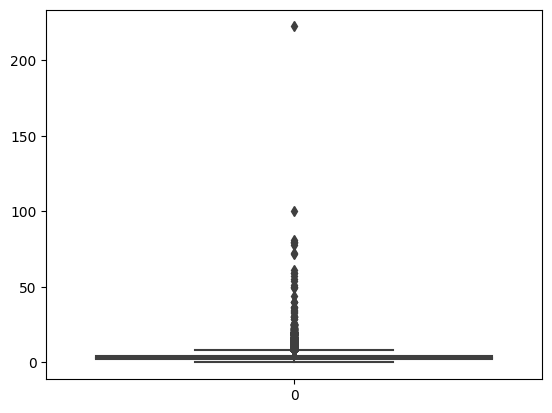

In [8]:
#tips Distribution

sns.boxplot(tlc['tip_amount'])

In [9]:
#Eliminate where tips > 50

#Find index where tip > 50
tipOutliers = tlc[tlc['tip_amount'] > 50].index

#Drop tip > 50
tlc.drop(index=tipOutliers, inplace=True)

<Axes: >

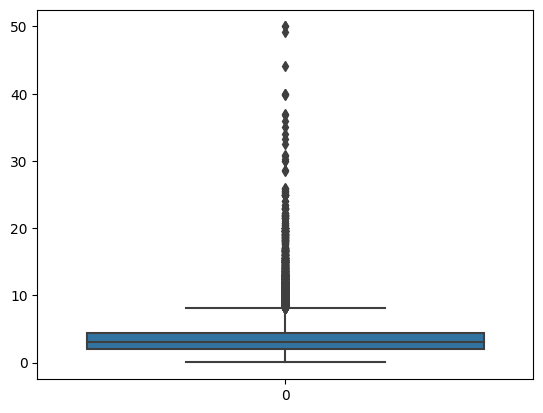

In [10]:
#tips Distribution after removing outlier

sns.boxplot(tlc['tip_amount'])

In [11]:
#Fare amount < 0

tlc[tlc['fare_amount'] >0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.00,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,1.5,4.85,0.0,NaN,1.0,29.20,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.0,2.00,0.0,NaN,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,NaN,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,NaN,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,NaN,1.0,22.50,1.0,1.0,2.75


## Construct DF used for Regression

In [12]:
#Check columns
tlc.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [13]:
#DF for regression
tlcReg = tlc[[ 'trip_distance', 'fare_amount', 'tip_amount']]
tlcReg

,trip_distance,fare_amount,tip_amount
0,2.58,14.9,4.03
1,1.81,10.7,2.64
2,0.00,7.2,1.94
3,1.30,6.5,1.70
6,3.80,19.1,4.85
...,...,...,...
63882,2.75,15.0,2.00
63883,2.44,13.5,3.20
63884,1.40,9.3,2.36
63885,2.47,13.5,3.75


**Reset Index**

In [14]:
#Reset index
tlcReg.reset_index(inplace=True)

In [15]:
#Drop old index col
tlcReg.drop(columns='index', inplace=True)

/var/folders/hp/56vw0j_10t7b71dy17hxntmh0000gp/T/ipykernel_26211/2803485310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlcReg.drop(columns='index', inplace=True)


In [16]:
tlcReg

,trip_distance,fare_amount,tip_amount
0,2.58,14.9,4.03
1,1.81,10.7,2.64
2,0.00,7.2,1.94
3,1.30,6.5,1.70
4,3.80,19.1,4.85
...,...,...,...
35524,2.75,15.0,2.00
35525,2.44,13.5,3.20
35526,1.40,9.3,2.36
35527,2.47,13.5,3.75


## Simple Regression

In [17]:
# Simple 1 feature Regression model
# total_bill as X
# tip as Y

#Create regression model sm.OLS(Y, X) , Method: Ordinary Least Squared (Memprediksi error paling kecil dgn pendekatan linear) 
reg_model = sm.OLS(tlcReg['tip_amount'], sm.add_constant(tlcReg['fare_amount']))
#
hasil = reg_model.fit()

print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 3.516e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:06:57   Log-Likelihood:                -72412.
No. Observations:               35529   AIC:                         1.448e+05
Df Residuals:                   35527   BIC:                         1.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8681      0.018     48.960      


**Interpreting results from Key Parameters :**

- R Squared: Berapa besar pengaruh X terhadap Y (X mempengaruhi tips sebesar 49.7%)
- Prob (F Statistic): uji keseluruhan/overall apakah Beta memberikan pengaruh (p value = 0.00, < 0.05, maka tolak H0 )
    - H0: Beta = 0, Beta tidak signifikan terhadap model 
    - H1: Beta != 0, Beta signifikan terhadap model
- Uji parsial, Check P > |t| , jika < 0.05 bisa dipakai untuk persamaan prediksi, semua 0.00 < 0.05
    - const coef = 0.8681
    - toal_bill coef = 0.1731


**Interpretasi:**

Y = B0 + B1X1

Y = 0.8681 + 0.1731


In [18]:
#Prediction Model, tips(x) based on fare_amount

def tips_pred(x):
    Y = 0.8681 + (0.1731*x)
    return Y

In [19]:
#Coba prediksi jumlah tips jika fare amount 13.5

tips_pred(13.5)

3.20495

## Multiple Regression

In [20]:
# Simple 2 feature Regression model
# total_bill as X
# tip as Y

#Create regression model sm.OLS(Y, X) , Method: Ordinary Least Squared (Memprediksi error paling kecil dgn pendekatan linear) 
reg_model = sm.OLS(tlcReg['tip_amount'], sm.add_constant(tlcReg[['fare_amount', 'trip_distance']]))
#
hasil = reg_model.fit()

print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:06:57   Log-Likelihood:                -72412.
No. Observations:               35529   AIC:                         1.448e+05
Df Residuals:                   35526   BIC:                         1.449e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8678      0.018     48.876